### Data fields
Here's a brief version of what you'll find in the data description file.

- SalePrice - the property's sale price in dollars. This is the target variable that you're trying to predict.
- MSSubClass: The building class
- MSZoning: The general zoning classification
- LotFrontage: Linear feet of street connected to property
- LotArea: Lot size in square feet
- Street: Type of road access
- Alley: Type of alley access
- LotShape: General shape of property
- LandContour: Flatness of the property
- Utilities: Type of utilities available
- LotConfig: Lot configuration
- LandSlope: Slope of property
- Neighborhood: Physical locations within Ames city limits
- Condition1: Proximity to main road or railroad
- Condition2: Proximity to main road or railroad (if a second is present)
- BldgType: Type of dwelling
- HouseStyle: Style of dwelling
- OverallQual: Overall material and finish quality
- OverallCond: Overall condition rating
- YearBuilt: Original construction date
- YearRemodAdd: Remodel date
- RoofStyle: Type of roof
- RoofMatl: Roof material
- Exterior1st: Exterior covering on house
- Exterior2nd: Exterior covering on house (if more than one material)
- MasVnrType: Masonry veneer type
- MasVnrArea: Masonry veneer area in square feet
- ExterQual: Exterior material quality
- ExterCond: Present condition of the material on the exterior
- Foundation: Type of foundation
- BsmtQual: Height of the basement
- BsmtCond: General condition of the basement
- BsmtExposure: Walkout or garden level basement walls
- BsmtFinType1: Quality of basement finished area
- BsmtFinSF1: Type 1 finished square feet
- BsmtFinType2: Quality of second finished area (if present)
- BsmtFinSF2: Type 2 finished square feet
- BsmtUnfSF: Unfinished square feet of basement area
- TotalBsmtSF: Total square feet of basement area
- Heating: Type of heating
- HeatingQC: Heating quality and condition
- CentralAir: Central air conditioning
- Electrical: Electrical system
- 1stFlrSF: First Floor square feet
- 2ndFlrSF: Second floor square feet
- LowQualFinSF: Low quality finished square feet (all floors)
- GrLivArea: Above grade (ground) living area square feet
- BsmtFullBath: Basement full bathrooms
- BsmtHalfBath: Basement half bathrooms
- FullBath: Full bathrooms above grade
- HalfBath: Half baths above grade
- Bedroom: Number of bedrooms above basement level
- Kitchen: Number of kitchens
- KitchenQual: Kitchen quality
- TotRmsAbvGrd: Total rooms above grade (does not include bathrooms)
- Functional: Home functionality rating
- Fireplaces: Number of fireplaces
- FireplaceQu: Fireplace quality
- GarageType: Garage location
- GarageYrBlt: Year garage was built
- GarageFinish: Interior finish of the garage
- GarageCars: Size of garage in car capacity
- GarageArea: Size of garage in square feet
- GarageQual: Garage quality
- GarageCond: Garage condition
- PavedDrive: Paved driveway
- WoodDeckSF: Wood deck area in square feet
- OpenPorchSF: Open porch area in square feet
- EnclosedPorch: Enclosed porch area in square feet
- 3SsnPorch: Three season porch area in square feet
- ScreenPorch: Screen porch area in square feet
- PoolArea: Pool area in square feet
- PoolQC: Pool quality
- Fence: Fence quality
- MiscFeature: Miscellaneous feature not covered in other categories
- MiscVal: $Value of miscellaneous feature
- MoSold: Month Sold
- YrSold: Year Sold
- SaleType: Type of sale
- SaleCondition: Condition of sale

In [1]:
# linear reggres
from sklearn.linear_model import LinearRegression

# model selection
from sklearn.model_selection import train_test_split 

# pandas, numpy, seaborn, 시각화
import pandas as pd
import numpy  as np
import matplotlib.pyplot as plt
import seaborn as sns

# 결측값 시각화
import missingno as ms
%matplotlib inline

# 경고문구
import warnings
warnings.filterwarnings('ignore')


from sklearn.metrics         import mean_absolute_error, mean_squared_error
from sklearn.preprocessing   import StandardScaler, MinMaxScaler

In [24]:
trainDF = pd.read_csv('../data/train.csv')
testDF = pd.read_csv('../data/test.csv')

###  데이터 타입과 null 값 획인 및 전처리
- null 값이 많은 컬럼과 불필요하다고 생각되는 컬럼 삭제

1) trainDF

In [25]:
trainDF = trainDF.dropna(axis=1)

In [26]:
trainDF.isna().sum()

Id               0
MSSubClass       0
MSZoning         0
LotArea          0
Street           0
                ..
MoSold           0
YrSold           0
SaleType         0
SaleCondition    0
SalePrice        0
Length: 62, dtype: int64

<AxesSubplot:>

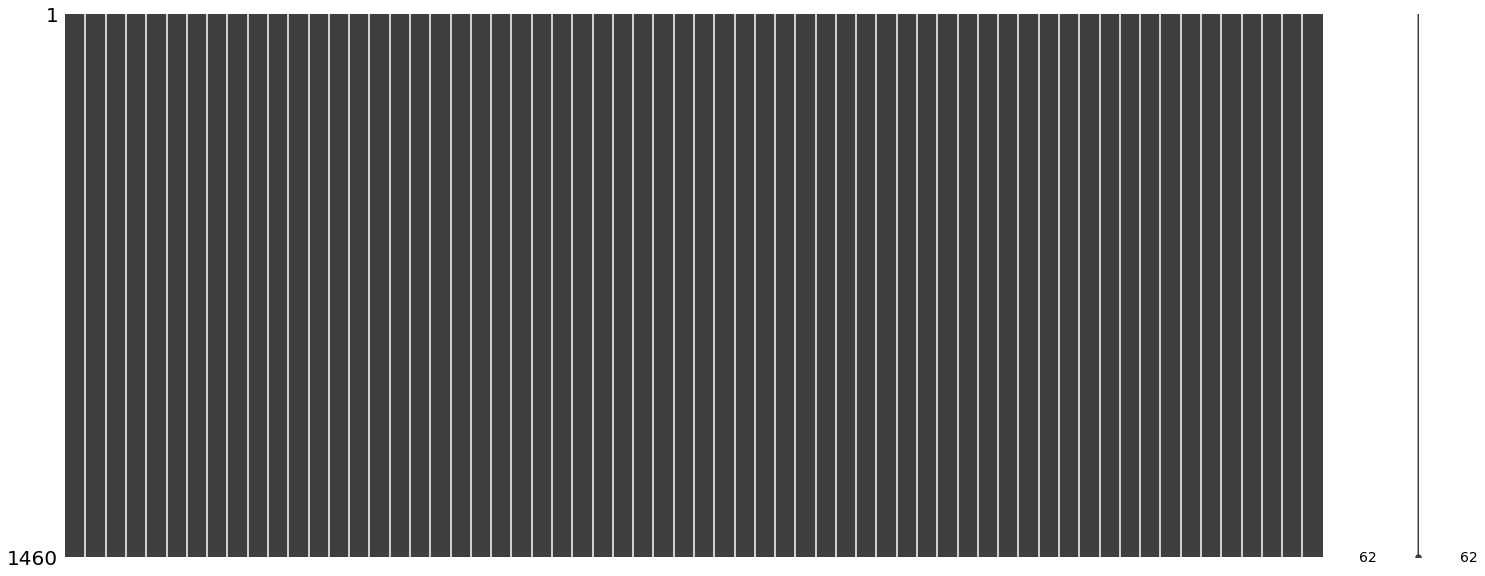

In [30]:
import missingno as msno
msno.matrix(trainDF)

In [34]:
# 상관관계 확인 --> 1이랑 가까울수록 관계가 깊음
# 주어진 문제에 대한 SalePrice의 상관관계 확인
trainDF.corr()

,Id,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
Id,1.000000,0.011156,-0.033226,-0.028365,0.012609,-0.012713,-0.021998,-0.005024,-0.005968,-0.007940,...,-0.029643,-0.000477,0.002889,-0.046635,0.001330,0.057044,-0.006242,0.021172,0.000712,-0.021917
MSSubClass,0.011156,1.000000,-0.139781,0.032628,-0.059316,0.027850,0.040581,-0.069836,-0.065649,-0.140759,...,-0.012579,-0.006100,-0.012037,-0.043825,-0.026030,0.008283,-0.007683,-0.013585,-0.021407,-0.084284
LotArea,-0.033226,-0.139781,1.000000,0.105806,-0.005636,0.014228,0.013788,0.214103,0.111170,-0.002618,...,0.171698,0.084774,-0.018340,0.020423,0.043160,0.077672,0.038068,0.001205,-0.014261,0.263843
OverallQual,-0.028365,0.032628,0.105806,1.000000,-0.091932,0.572323,0.550684,0.239666,-0.059119,0.308159,...,0.238923,0.308819,-0.113937,0.030371,0.064886,0.065166,-0.031406,0.070815,-0.027347,0.790982
OverallCond,0.012609,-0.059316,-0.005636,-0.091932,1.000000,-0.375983,0.073741,-0.046231,0.040229,-0.136841,...,-0.003334,-0.032589,0.070356,0.025504,0.054811,-0.001985,0.068777,-0.003511,0.043950,-0.077856
YearBuilt,-0.012713,0.027850,0.014228,0.572323,-0.375983,1.000000,0.592855,0.249503,-0.049107,0.149040,...,0.224880,0.188686,-0.387268,0.031355,-0.050364,0.004950,-0.034383,0.012398,-0.013618,0.522897
YearRemodAdd,-0.021998,0.040581,0.013788,0.550684,0.073741,0.592855,1.000000,0.128451,-0.067759,0.181133,...,0.205726,0.226298,-0.193919,0.045286,-0.038740,0.005829,-0.010286,0.021490,0.035743,0.507101
BsmtFinSF1,-0.005024,-0.069836,0.214103,0.239666,-0.046231,0.249503,0.128451,1.000000,-0.050117,-0.495251,...,0.204306,0.111761,-0.102303,0.026451,0.062021,0.140491,0.003571,-0.015727,0.014359,0.386420
BsmtFinSF2,-0.005968,-0.065649,0.111170,-0.059119,0.040229,-0.049107,-0.067759,-0.050117,1.000000,-0.209294,...,0.067898,0.003093,0.036543,-0.029993,0.088871,0.041709,0.004940,-0.015211,0.031706,-0.011378
BsmtUnfSF,-0.007940,-0.140759,-0.002618,0.308159,-0.136841,0.149040,0.181133,-0.495251,-0.209294,1.000000,...,-0.005316,0.129005,-0.002538,0.020764,-0.012579,-0.035092,-0.023837,0.034888,-0.041258,0.214479


In [37]:
# 50% 이상 : OverallQual, YearBuilt, TotalBsmtSF, 1stFlrSF, GrLivArea, FullBath, TotRmsAbvGrd, GarageCars, GarageArea
# testDF에 없는 컬럼 : 'GarageArea', 'GarageCars', 'TotalBsmtSF' 제외
trainDF = trainDF[['OverallQual', 'YearBuilt', '1stFlrSF', 
                   'GrLivArea', 'FullBath', 'TotRmsAbvGrd']]

2) testDF

In [28]:
testDF = testDF.dropna(axis=1)

In [29]:
testDF.isna().sum()

Id               0
MSSubClass       0
LotArea          0
Street           0
LotShape         0
LandContour      0
LotConfig        0
LandSlope        0
Neighborhood     0
Condition1       0
Condition2       0
BldgType         0
HouseStyle       0
OverallQual      0
OverallCond      0
YearBuilt        0
YearRemodAdd     0
RoofStyle        0
RoofMatl         0
ExterQual        0
ExterCond        0
Foundation       0
Heating          0
HeatingQC        0
CentralAir       0
Electrical       0
1stFlrSF         0
2ndFlrSF         0
LowQualFinSF     0
GrLivArea        0
FullBath         0
HalfBath         0
BedroomAbvGr     0
KitchenAbvGr     0
TotRmsAbvGrd     0
Fireplaces       0
PavedDrive       0
WoodDeckSF       0
OpenPorchSF      0
EnclosedPorch    0
3SsnPorch        0
ScreenPorch      0
PoolArea         0
MiscVal          0
MoSold           0
YrSold           0
SaleCondition    0
dtype: int64

<AxesSubplot:>

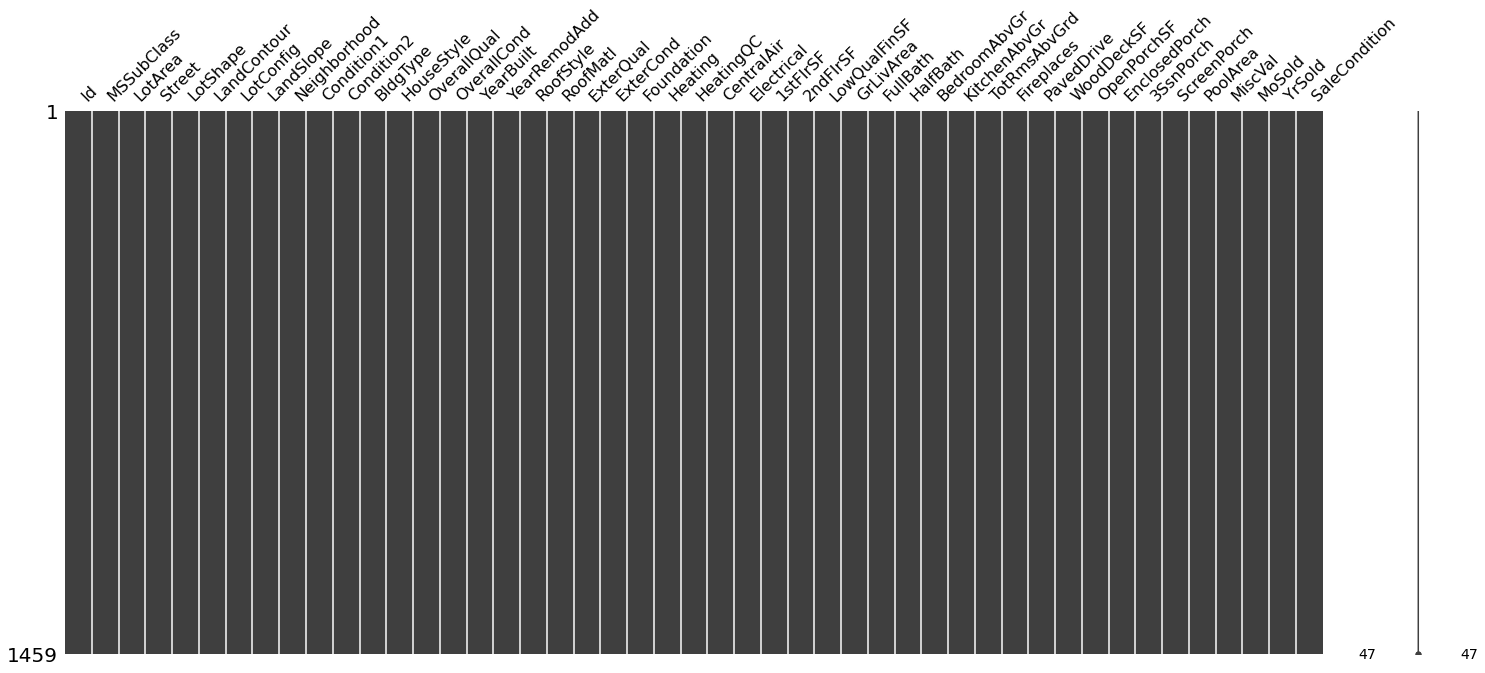

In [31]:
import missingno as msno
msno.matrix(testDF)

In [38]:
testDF = testDF[['OverallQual', 'YearBuilt', '1stFlrSF', 
                   'GrLivArea', 'FullBath', 'TotRmsAbvGrd']]

###  drop 하지 않은 컬럼 중 숫자형 null 컬럼들은 평균값으로 대체

1) trainDF

In [41]:
trainDF = trainDF.replace(0, trainDF.mean())
trainDF

,OverallQual,YearBuilt,1stFlrSF,GrLivArea,FullBath,TotRmsAbvGrd
0,7,2003,856,1710,2.0,8
1,6,1976,1262,1262,2.0,6
2,7,2001,920,1786,2.0,6
3,7,1915,961,1717,1.0,7
4,8,2000,1145,2198,2.0,9
...,...,...,...,...,...,...
1455,6,1999,953,1647,2.0,7
1456,6,1978,2073,2073,2.0,7
1457,7,1941,1188,2340,2.0,9
1458,5,1950,1078,1078,1.0,5


2) testDF

In [42]:
testDF = testDF.replace(0, testDF.mean())
testDF

,OverallQual,YearBuilt,1stFlrSF,GrLivArea,FullBath,TotRmsAbvGrd
0,5,1961,896,896,1.0,5
1,6,1958,1329,1329,1.0,6
2,5,1997,928,1629,2.0,6
3,6,1998,926,1604,2.0,7
4,8,1992,1280,1280,2.0,5
...,...,...,...,...,...,...
1454,4,1970,546,1092,1.0,5
1455,4,1970,546,1092,1.0,6
1456,5,1960,1224,1224,1.0,7
1457,5,1992,970,970,1.0,6


### 타겟값 분포 확인 및 스케일링

1) trainDF

In [45]:
trainDF.describe()

,OverallQual,YearBuilt,1stFlrSF,GrLivArea,FullBath,TotRmsAbvGrd
count,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,6.099315,1971.267808,1162.626712,1515.463699,1.574716,6.517808
std,1.382997,30.202904,386.587738,525.480383,0.536941,1.625393
min,1.000000,1872.000000,334.000000,334.000000,1.000000,2.000000
25%,5.000000,1954.000000,882.000000,1129.500000,1.000000,5.000000
50%,6.000000,1973.000000,1087.000000,1464.000000,2.000000,6.000000
75%,7.000000,2000.000000,1391.250000,1776.750000,2.000000,7.000000
max,10.000000,2010.000000,4692.000000,5642.000000,3.000000,14.000000


2) testDF

In [46]:
testDF.describe()

,OverallQual,YearBuilt,1stFlrSF,GrLivArea,FullBath,TotRmsAbvGrd
count,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000
mean,6.078821,1971.357779,1156.534613,1486.045922,1.574169,6.385195
std,1.436812,30.390071,398.165820,485.566099,0.550588,1.508895
min,1.000000,1879.000000,407.000000,407.000000,1.000000,3.000000
25%,5.000000,1953.000000,873.500000,1117.500000,1.000000,5.000000
50%,6.000000,1973.000000,1079.000000,1432.000000,2.000000,6.000000
75%,7.000000,2001.000000,1382.500000,1721.000000,2.000000,7.000000
max,10.000000,2010.000000,5095.000000,5095.000000,4.000000,15.000000


In [49]:
scaler = MinMaxScaler()

scaler.fit(trainDF)
scaler_train = scaler.transform(trainDF)

print('original', trainDF)
print('scaler' ,scaler_train)

scaler_test = scaler.transform(testDF)

print('original', testDF)
print('scaler' ,scaler_test)

original       OverallQual  YearBuilt  1stFlrSF  GrLivArea  FullBath  TotRmsAbvGrd
0               7       2003       856       1710       2.0             8
1               6       1976      1262       1262       2.0             6
2               7       2001       920       1786       2.0             6
3               7       1915       961       1717       1.0             7
4               8       2000      1145       2198       2.0             9
...           ...        ...       ...        ...       ...           ...
1455            6       1999       953       1647       2.0             7
1456            6       1978      2073       2073       2.0             7
1457            7       1941      1188       2340       2.0             9
1458            5       1950      1078       1078       1.0             5
1459            5       1965      1256       1256       1.0             6

[1460 rows x 6 columns]
scaler [[0.66666667 0.94927536 0.11977972 0.25923135 0.5        0.5       ]
 [